Mounted at /content/drive


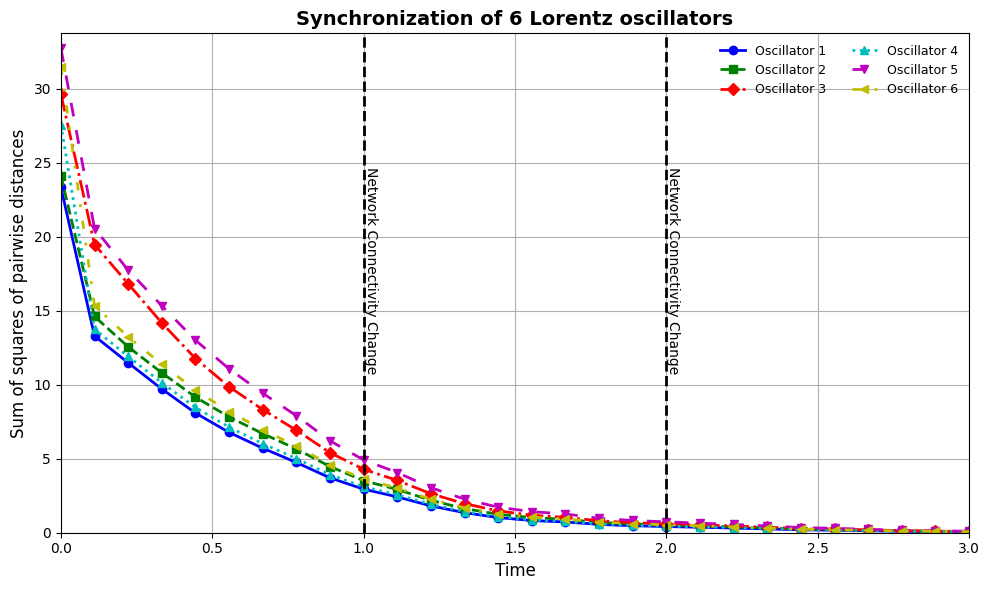

In [1]:
# ===== Mount Google Drive =====
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import numpy as np
import os

# ===== File paths =====
# Path to input Excel file
file_path = '/content/drive/My Drive/synchronization_data.xlsx'

# Path to save the output figure (EPS format)
save_path = '/content/drive/My Drive/Synchronization_image.eps'

# ===== Load data from Excel =====
df = pd.read_excel(file_path, sheet_name=0)

# Drop completely empty rows (if any)
df = df.dropna(how='all')

# Extract time values from column A
t = df.iloc[:, 0].to_numpy()

# Extract data from columns B–K (10 oscillators), transpose to get shape (10, n)
E = df.iloc[:, 1:7].to_numpy().T

# ===== Create plot =====
fig, ax = plt.subplots(figsize=(10, 6))

# Style options
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FF7F0E', '#8B0000', '#006400']
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h']
linestyles = [
    '-', '--', '-.', ':', (0, (5, 5)), (0, (3, 5, 1, 5)),
    (0, (3, 1, 1, 1)), (0, (5, 10)), (0, (3, 10, 1, 10)), (0, (1, 1))
]

# Plot each oscillator
for i in range(E.shape[0]):
    ax.plot(
        t, E[i],
        label=f'Oscillator {i+1}',
        color=colors[i % len(colors)],
        marker=markers[i % len(markers)],
        linestyle=linestyles[i % len(linestyles)],
        linewidth=2,
        markersize=6
    )

# ===== Labels, title, and formatting =====
ax.set_xlabel("Time", fontsize=12)
ax.set_ylabel("Sum of squares of pairwise distances", fontsize=12)
ax.set_title("Synchronization of 6 Lorentz oscillators", fontsize=14, fontweight='bold')

# Add vertical dashed black line at x = 1.5 and label it
ax.axvline(x=1, color='black', linestyle='--', linewidth=2)
ax.axvline(x=2, color='black', linestyle='--', linewidth=2)
plt.text(1,np.max(E)/3, 'Network Connectivity Change', rotation=-90)
plt.text(2,np.max(E)/3, 'Network Connectivity Change', rotation=-90)

# Legend and grid
ax.legend(fontsize=9, loc='upper right', frameon=False, ncol=2)
ax.grid(True)

# Set axis limits
plt.xlim(0,max(t))
plt.ylim(0,np.max(E)+1)
plt.tight_layout()

# ===== Save and display =====
plt.savefig(save_path, format='eps')  # Save in EPS format
plt.show()
plt.close()  # Close the plot to free up memory